## Data620 - FINAL PROJECT 


### Introduction

Social  networks  are  the  main  resources  to  gather information   about   people’s   opinion   and   sentiments   towards different  topics  as  they  spend  hours  daily  on social  media and share   their   opinion. In   this   project   we   show   the application of sentimental analysis and how to connect to Twitter and  run  sentiment analysis  queries, based on News Topics during COVID-19.

### Motivation

Six months since the first COVID-19 case in the United States, and 113+ days into the earliest Lockdown Order of New York City, now the city reopen the time some other states see coronavirus cases rise. how have people been feeling through this special time? Do we know how others are responding to the pandemic? The Corona Virus endangers our physical health indeed, but alongside, social distancing also poses a threat to our emotional stability. Thus, it is crucial to understand public sentiments under COVID-19. To analyze these we'll use Sentiment Analysis on tweets to aid the understanding of sentiment trends.

As of now Covid-19 is one of the top trending topics. Presently it stands in 7th position in the twitter hot topics.

![alt text](Twittertrend.png)

### Data Source

We will be using the Twitter API, as our tool to collect data for this analysis. Twitter is a gold mine of data. Unlike other social platforms, almost every user’s tweets are completely public and pullable. This is a huge plus if you’re trying to get a large amount of data to run analytics on.

![alt text](twitter.png)

Note: Results will differ each time the program runs as Network and Sentiment analysis is done in a dynamic dataset.

**Import required Libraries**

In [118]:
#import nltk
#nltk.download('vader_lexicon')
#pip install tweepy
#pip install textblob
#pip install nxviz as nv
#from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#import nltk
#nltk.download('wordnet')

import pandas as pd
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import warnings
import itertools
warnings.filterwarnings('ignore')
import collections

# loading libraries
from tweepy import OAuthHandler
import networkx as nx
import pandas as pd
import json
#import nxviz as nv

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/taha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load the Data and Create a Dataframe
----------------------------------------------
**Connect to Twitter using 'consumer key', 'consumer secret', 'access token', 'access token secret'**

In [7]:
consumer_key='lub2vXiqJXY5JVYTtxaQWvshE'
consumer_secret='o4tRCRf1YWo1WdrQzx1xNhuSvOIshguPZNx86U9UVCaNzsLPEF'
access_token='165276006-rCCM1Nt4txkpxMa01RJLUuq7WrF9sREqxHFApiUm'
access_token_secret='lf2SmfrfrIBd2aiYmq24oPfXVlZSLBamJDEMjM5eHtvkE'

**Set The API path**

In [119]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Covid_19')

**Search for tweets related to Covid**

In [120]:

search_term = "#Covid -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-03-25').items(1000)

**Convert twitter data into a dataframe**

In [121]:

json_data = [r._json for r in tweets]
df = pd.io.json.json_normalize(json_data)


Analyze the dataset

In [122]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,quoted_status.entities.media,quoted_status.extended_entities.media,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Sun Jul 19 23:39:39 +0000 2020,1284996355140644864,1284996355140644864,Catching up on some reading and this from @sag...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jul 19 23:39:16 +0000 2020,1284996257249779712,1284996257249779712,Ur referencing JAMA which takes Pharma 💴 &amp;...,True,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Jul 19 23:39:12 +0000 2020,1284996239394668545,1284996239394668545,#globalbuzz The total fatalities from #COVID-1...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 19 23:38:29 +0000 2020,1284996059798876162,1284996059798876162,Visiting mom quarantined in temp nursing home ...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Jul 19 23:38:23 +0000 2020,1284996034503020545,1284996034503020545,"This is our friend Kevin. Perfectly healthy, n...",True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Wrangling
-----------------------------------

In order to do Sentiment anaysis on the dataframe, we will keep only one column "texts" an drop other columns not required for sentiment analysis

**Create a new column 'Tweets'**

In [123]:
df['Tweets'] = df['text']

In this step we'll create a new dataframe object "df_SentimentAnalysis" to preserve the original dataset "df" 

In [124]:
df_1 = df

df_1.head() ## added new column "Tweets"

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,quoted_status.entities.media,quoted_status.extended_entities.media,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates,Tweets
0,Sun Jul 19 23:39:39 +0000 2020,1284996355140644864,1284996355140644864,Catching up on some reading and this from @sag...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catching up on some reading and this from @sag...
1,Sun Jul 19 23:39:16 +0000 2020,1284996257249779712,1284996257249779712,Ur referencing JAMA which takes Pharma 💴 &amp;...,True,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ur referencing JAMA which takes Pharma 💴 &amp;...
2,Sun Jul 19 23:39:12 +0000 2020,1284996239394668545,1284996239394668545,#globalbuzz The total fatalities from #COVID-1...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#globalbuzz The total fatalities from #COVID-1...
3,Sun Jul 19 23:38:29 +0000 2020,1284996059798876162,1284996059798876162,Visiting mom quarantined in temp nursing home ...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visiting mom quarantined in temp nursing home ...
4,Sun Jul 19 23:38:23 +0000 2020,1284996034503020545,1284996034503020545,"This is our friend Kevin. Perfectly healthy, n...",True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This is our friend Kevin. Perfectly healthy, n..."


Now we'll drop all other columns except "Tweets" for sentiment analysis

In [125]:
drop_list = ["Tweets"]
df_1 = df_SentimentAnalysis.drop(df_SentimentAnalysis.columns.difference(drop_list), axis=1)

In [126]:
# We'll create a function to clean the tweets

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df_1['Tweets'] = df_1['Tweets'].apply(cleanTxt)
df_1

,Tweets
0,"Where in Lanarkshire? Or, like everything else..."
1,Help protect yourself and others from COVID-19...
2,As the bodies pile up and the virus ravages th...
3,One tech company's COVID SuccessStory - offers...
4,🔴LIES. Remember your loved ones dead or chron...
...,...
995,What does this driver do when they see a muskr...
996,Just heard a news bobble head let it slip that...
997,19 ☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️ read this!!!!! R...
998,Watch: Pigs wander around freely at Covid hosp...


###  Data Exploration and Running A Sentiment Analysis for All Tweets

### Polarity and a Subjectivity Metric

With  the  aim  to  understand  the  people  reaction  during  the COVID-19 pandemic, we performed extensive analysis on the sentiment of the shared tweets and the users, With the help of TextBlob, a sentiment analysis library in Python, we extracted how subjective/objective (subjectivity) the content is and whether the content is positive or negative (polarity) for each tweet.

Now lets explore our data based on subjectivity and polarity

**Subjectivity:** (How subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion). 

**"Polarity:"** (How positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).


Create a function to get the subjectivity and polarity abd further create two new columns to analysze our dataframe

In [138]:
df_SentimentAnalysis = df_1

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis['Subjectivity'] = df_SentimentAnalysis['Tweets'].apply(getSubjectivity)
df_SentimentAnalysis['Polarity'] = df_SentimentAnalysis['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis

,Tweets,Subjectivity,Polarity,Analysis
0,"Where in Lanarkshire? Or, like everything else...",0.850000,-0.200000,-1
1,Help protect yourself and others from COVID-19...,0.050000,0.000000,0
2,As the bodies pile up and the virus ravages th...,0.600000,-0.400000,-1
3,One tech company's COVID SuccessStory - offers...,0.000000,0.100000,1
4,🔴LIES. Remember your loved ones dead or chron...,0.685714,-0.071429,-1
...,...,...,...,...
995,What does this driver do when they see a muskr...,0.000000,0.000000,0
996,Just heard a news bobble head let it slip that...,0.166667,-0.166667,-1
997,19 ☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️ read this!!!!! R...,0.000000,0.000000,0
998,Watch: Pigs wander around freely at Covid hosp...,0.800000,0.400000,1


In [139]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df_SentimentAnalysis['Analysis'] = df_SentimentAnalysis['Polarity'].apply(ratio)

    
df_SentimentAnalysis
    
    

,Tweets,Subjectivity,Polarity,Analysis
0,"Where in Lanarkshire? Or, like everything else...",0.850000,-0.200000,-1
1,Help protect yourself and others from COVID-19...,0.050000,0.000000,0
2,As the bodies pile up and the virus ravages th...,0.600000,-0.400000,-1
3,One tech company's COVID SuccessStory - offers...,0.000000,0.100000,1
4,🔴LIES. Remember your loved ones dead or chron...,0.685714,-0.071429,-1
...,...,...,...,...
995,What does this driver do when they see a muskr...,0.000000,0.000000,0
996,Just heard a news bobble head let it slip that...,0.166667,-0.166667,-1
997,19 ☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️☝️ read this!!!!! R...,0.000000,0.000000,0
998,Watch: Pigs wander around freely at Covid hosp...,0.800000,0.400000,1


**Plot the polarity and subjectivity** 

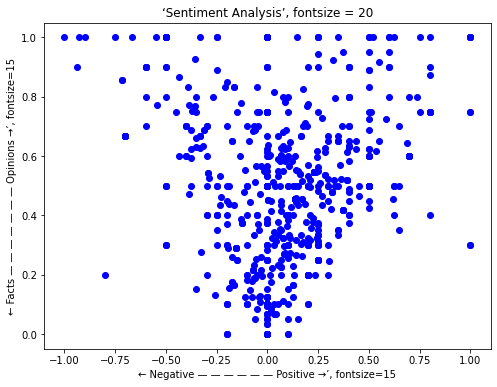

In [135]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df_SentimentAnalysis.shape[0]):
    plt.scatter(df_SentimentAnalysis["Polarity"][i], df_SentimentAnalysis["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('‘Sentiment Analysis’, fontsize = 20') 
plt.xlabel('← Negative — — — — — — Positive →’, fontsize=15') 
plt.ylabel('← Facts — — — — — — — Opinions →’, fontsize=15') 
plt.show()

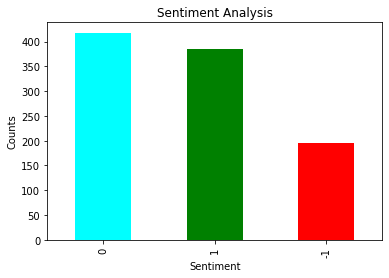

In [136]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_SentimentAnalysis['Analysis'].value_counts().plot(kind = 'bar' , color=['cyan', 'green', 'red'])
plt.show()

According to the charts above, with the development of COVID-19, the related tweets’ expression are more subjective, and people’s feelings are more positive. Why did this happen? Why with more and more people being infected with Coronavirus, the sentiment of related tweets went positive? one explaination of positivity growth is the sentiment about stay at home, which echoes the point brought above that people are getting less sensitive during the quarantine.

### Word Cloud

Before we go deeper into our analysis we want to get idea about what kind of covid related topics people talked about, so we created a word cloud visualization.

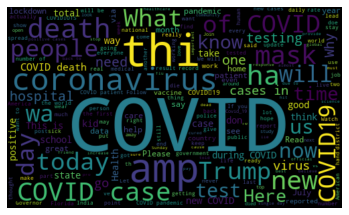

In [137]:
# Word cloud visualization
allWords = ' '.join([twts for twts in df_SentimentAnalysis['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can observe that the topics such as "Mask", "Covid case", "death" and "Trump" are the most used words related to covid tweets.

### Network Analysis of Trump Administration's handling for COVID-19

As we analyze from the above bar graph, Neutral tweets and positive tweets are more compared to negative tweets.

In this section we intend to utilize Twitter data to analyze social networks among public key players for COVID-19. 
and aslo to find out the clusters from data. Although we wanted to import large enough dataset from twitter to come up with a reliable analysis but accessibility is an issue with twitter and we might not be able to get more than 1000 tweets. 

Using tweepy we are going to extract the data regarding covid-19 from Trump Administration along with their replies from people in US. 

In [142]:
# Getting access to twitter
consumer_key = 'mT2zRRcMnlSiqkN130v2w8mCL'
consumer_secret = '0APlMqJY83HLC2opaBTi2wby0ONO3vApTeoc7Z2HMC3RuKJTGm'
access_token = '1013888021731643392-88W3ct7k8FcG0d1lfsM1O7m2gLsQN6'
access_secret = '8SpqLPEIHNYqihfCzkCOKPJukypUsN63CtdwOoYz14sxd'

In [143]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [144]:
# Adding parameters
search_words = '#COVID OR #Corona OR #COVID-19'
#search_words = '#COVID'
date_since = "2019-12-01"


In [145]:
# Getting data
tweets = tweepy.Cursor(api.search,
                      q= search_words,
                      lang="en",
                      since= date_since).items(1000)
if tweets:
    print("Twitter is connected successfully")

Twitter is connected successfully


In [146]:
# Converting the tweets into dataframe
#tweet_data = [[ "'" + str(tweet.id), tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
#tweets_df = pd.DataFrame(data = tweet_data,
                        #columns=['tweet_id', 'created_at', 'user', "location", "text"])
#tweets_df

In [147]:
# Converting the tweets into dataframe
tweet_data = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
tweets_df = pd.DataFrame(data = tweet_data,
                        columns=['user', "location", "replies"])

# Extracting the user names of people who tweeted back 
tweets_df = tweets_df[tweets_df['replies'].str.contains("RT")]
tweets_df['replies'] = tweets_df['replies'].str.extract('([\\w @]+)')
tweets_df['replies'] = tweets_df['replies'].str.replace('RT ', '')
tweets_df['replies'] = tweets_df['replies'].str.replace('@', '')
tweets_df
tweets_df.head(20)

,user,location,replies
0,jjdressgown42,"Texas, USA",koho48275529
1,ANGELS_OF_HOPE,"Cape Coral, FL.",DiamondandSilk
2,JohnHighNote,"Ohio, USA",ElyseCane
3,Shaun__Keating,"Hatfield, PA",TonyBrunoShow
4,dreamflh,,drdavidsamadi
5,sejeongbaby,,balloon_wanted
7,piiiiuuuummpppp,,MHealthFairview
9,__Nomandla,,alfredwkng
10,debtwitsit,"North Carolina, USA",OurRevolution
11,fast_nicky,"East Meadow, NY",EastMeadowPatch


In [156]:
# Importing data into network using from_pandas_edgelist 
G_rt = nx.from_pandas_edgelist(tweets_df,
                              source= 'user',
                              target='replies',
                              create_using= nx.DiGraph())


In [157]:
# Calculating the nodes and edges
print("Total nodes are ", len(G_rt.nodes()))
print("Total edges are ", len(G_rt.edges()))

Total nodes are  1142
Total edges are  804


In [158]:
# Creating list of top influential nodes
cal = pd.DataFrame()
cal['n'] = nx.degree_centrality(G_rt).values()
cal.index = list(G_rt)
cal = cal.sort_values('n', ascending=False)
cal = cal.head(10)
print(cal)

# Dictionary of top 10 nodes
labels= {}
for node in G_rt.nodes():
    if node in cal.index:
        labels[node] = node

                       n
ksorbs          0.046450
drdavidsamadi   0.040316
alfredwkng      0.034181
KeishaBottoms   0.028046
_orabora        0.024540
mhdksafa        0.024540
DiamondandSilk  0.015776
JoeBiden        0.012270
cnnphilippines  0.009641
marcformarc     0.009641


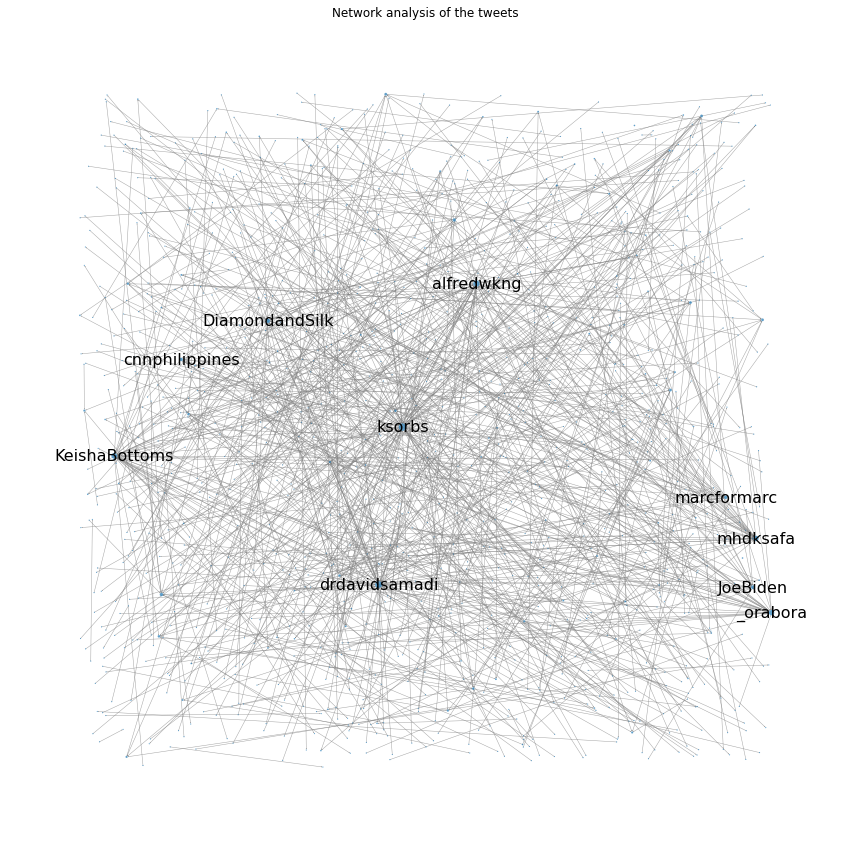

In [159]:
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw metwork
plt.figure(figsize=(15,15))
nx.draw_networkx(G_rt, pos,
                 with_labels=False,
                 node_size= sizes,
                 width=0.5, 
                 alpha=0.7,
                 arrowsize=1,
                 linewidths=0.1,
                 edge_color='Gray', seed=2)
nx.draw_networkx_labels(G_rt, pos, labels, font_size=16, font_color='black')
plt.title('Network analysis of the tweets')
plt.axis('off');plt.show()


In [152]:
# Calculations

# Creating dataframe with calculations
cal = pd.DataFrame()
cal['eigen_centrality'] = nx.eigenvector_centrality(G_rt).values()
cal['degree_centrality'] = nx.degree_centrality(G_rt).values()
cal['between_centrality'] = nx.betweenness_centrality(G_rt).values()
cal['closeness_centrality'] = nx.closeness_centrality(G_rt).values()

# Setting index to nodes
cal.index = list(G_rt)
cal.head(5)

,eigen_centrality,degree_centrality,between_centrality,closeness_centrality
jjdressgown42,5.960464e-08,0.000876,0.0,0.000000
koho48275529,1.430511e-06,0.000876,0.0,0.000876
ANGELS_OF_HOPE,5.960464e-08,0.001753,0.0,0.000000
DiamondandSilk,2.473593e-05,0.015776,0.0,0.015776
JohnHighNote,5.960464e-08,0.000876,0.0,0.000000


# Degree of Centrality

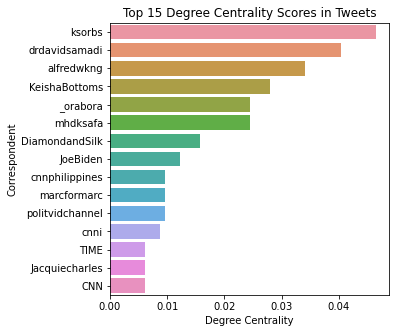

In [153]:
# Top Influential users
cent = nx.degree_centrality(G_rt)
name = []
centrality = []

# Iterating
for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by= 'centrality', ascending=False)

# Creating plot 
plt.figure(figsize=(5, 5))
_ = sns.barplot(x='centrality', y='name', data=cent[:15], orient='h')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Degree Centrality Scores in Tweets')
plt.show()

JudgeJeannine, orabora, drdavidsamadi and CNN are the top most influential users among the network. Next we will see betweenness centrality which measures the degree to which each node is the 'single point of contact', it means between other nodes or cliques. 

# Betweenness Centrality

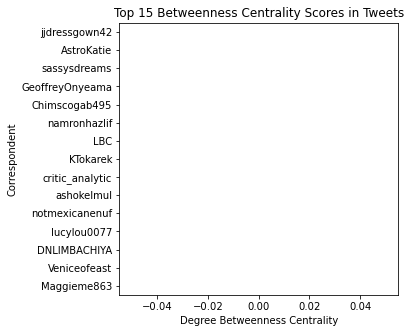

In [160]:
between = nx.betweenness_centrality(G_rt)
name = []
betweenness = []

for key, value in between.items():
    name.append(key)
    betweenness.append(value)

bet = pd.DataFrame()
bet['name'] = name
bet['betweenness'] = betweenness
bet = bet.sort_values(by='betweenness', ascending=False)


plt.figure(figsize=(5,5))
_ = sns.barplot(x='betweenness', y='name', data=bet[:15], orient='h')
_ = plt.xlabel('Degree Betweenness Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Betweenness Centrality Scores in Tweets')
plt.show()

As we said, it measures the number of times a node lies on the shortest path between other nodes. It shows which nodes are 'bridges' between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one. Unfortunately, due to high number of nodes and limited access to tweets (n=1000) there is no bridge between nodes in a network but it is very useful fore finding the individuals who influence the flow around a system.

Let's move ahead and calculate closeness of centrality. It scores each node based on their closeness to all other nodes in the network.

# Closeness of Centrality

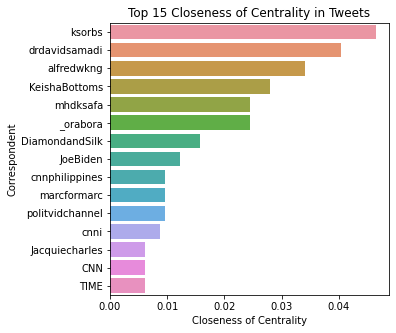

In [161]:
close = nx.closeness_centrality(G_rt)
name = []
closeness = []

for key, value in close.items():
    name.append(key)
    closeness.append(value)

clo = pd.DataFrame()
clo['name'] = name
clo['closeness'] = closeness
clo = clo.sort_values(by='closeness', ascending=False)


plt.figure(figsize=(5,5))
_ = sns.barplot(x='closeness', y='name', data=clo[:15], orient='h')
_ = plt.xlabel('Closeness of Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Closeness of Centrality in Tweets')
plt.show()

Closeness centrality calculates the shortest paths between all nodes. It is very useful to find the individuals who are best placed to influence the entire network quickly. It helps finding 'broadcasters' but in a highly connected network, you will often find all nodes have a similar score.  What may be more useful is using closeness to find influencers in a single cluster